<a href="https://colab.research.google.com/github/Chhavi-Trivedi/python-package/blob/master/knn_for_classification_using_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
#Load the dataset

df = pd.read_csv('/content/diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Let's observe the shape of the dataframe.
df.shape

(768, 9)

In [ ]:
#Let's create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

manhattan
0.6915584415584416

0.7077922077922078

0.7142857142857143

0.6915584415584416

0.7045454545454546

0.7045454545454546

0.6915584415584416

0.7077922077922078



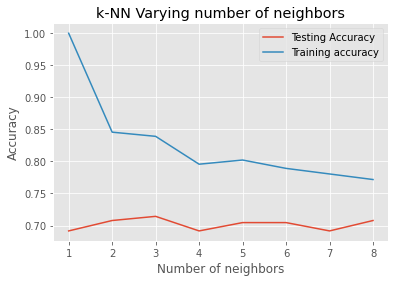

cosine
0.6201298701298701

0.6428571428571429

0.6331168831168831

0.6753246753246753

0.6623376623376623

0.6655844155844156

0.6461038961038961

0.6493506493506493



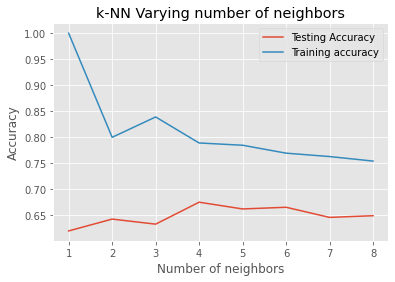

euclidean
0.6785714285714286

0.6948051948051948

0.685064935064935

0.7077922077922078

0.7012987012987013

0.724025974025974

0.7305194805194806

0.7012987012987013



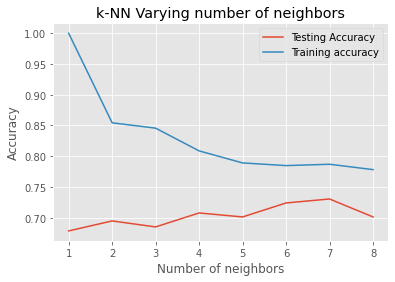

minkowski
0.6785714285714286

0.6948051948051948

0.685064935064935

0.7077922077922078

0.7012987012987013

0.724025974025974

0.7305194805194806

0.7012987012987013



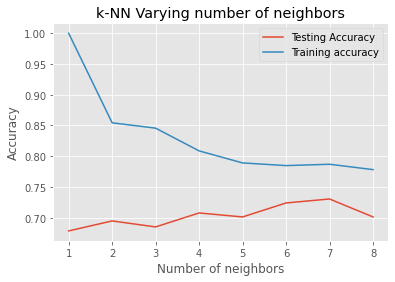

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
distance=['manhattan','cosine','euclidean','minkowski']
for j in range(4):
  print(distance[j])
  for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k,metric=distance[j])
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    print(test_accuracy[i])
    print()
    #Generate plot
  plt.title('k-NN Varying number of neighbors')
  plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
  plt.plot(neighbors, train_accuracy, label='Training accuracy')
  plt.legend()
  plt.xlabel('Number of neighbors')
  plt.ylabel('Accuracy')
  plt.show()

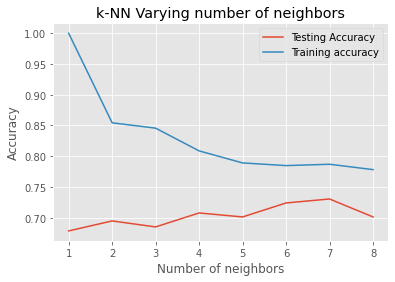

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k=7 and for matric minkowski and ecludian. So lets create a KNeighborsClassifier with number of neighbors as 7 and matrix minkowski.

In [ ]:
#Setup a knn classifier with k neighbors by default the matric is minkowski
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7305194805194806

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

Confusion matrix can also be obtained using crosstab method of pandas.

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,165,36,201
1,47,60,107
All,212,96,308
